In [1]:
!nvidia-smi

XXX May XX 20:00:53 XXXX       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI XXX.XX                 Driver Version: XXX.XX         CUDA Version: XX.X     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:02:00.0 Off |                  N/A |
| N/A   50C    P8              8W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics==8.0.196
!pip install roboflow
!pip install pickleshare

In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196  Python-3.9.13 torch-1.10.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)
Setup complete  (8 CPUs, XXXX GB RAM, XXXXX/XXXXX XX disk)


In [6]:
import torch
print("cuda is_available:" + str(torch.cuda.is_available()))
print("cuda device_count:" + str(torch.cuda.device_count()))
print("cuda current_device:" + str(torch.cuda.current_device()))
print("cuda device:" + str(torch.cuda.device(0)))
print("cuda get_device_name:" + str(torch.cuda.get_device_name(0)))

cuda is_available:True
cuda device_count:1
cuda current_device:0
cuda device:<torch.cuda.device object at 0x0000026878D04E20>
cuda get_device_name:NVIDIA GeForce GTX 1650 with Max-Q Design


In [2]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\myuser\repos\tornado-madness-bot


In [23]:
project = "tornado_madness"
version = 6
class dataset:
    location = f'{HOME}\{project}-{version}'
print(f'{dataset.location}')

C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6


In [7]:
%cd {HOME}
from ultralytics import YOLO
from ultralytics.utils.files import increment_path
runs_dir = 'runs/detect/train'
TRAIN_DIR = increment_path(runs_dir, exist_ok=False)

model = YOLO('yolov8s.pt')
results = model.train(
    data=f'{dataset.location}\data.yaml',
    imgsz=800,
    epochs=50,
    batch=-1,
    save=True,
    save_dir=TRAIN_DIR,
)
# !yolo task=detect mode=train model= data={dataset.location}/data.yaml epochs=1 imgsz=800 plots=True batch=-1 device=0 save_dir="{TRAIN_DIR}"

New https://pypi.org/project/ultralytics/8.2.14 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.9.13 torch-1.10.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.


C:\Users\myuser\repos\tornado-madness-bot


engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\data.yaml, epochs=50, patience=50, batch=-1, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplif

In [9]:
from ultralytics.utils.files import increment_path
runs_dir = 'runs/detect/train'
TRAIN_DIR = increment_path(runs_dir, exist_ok=True)
print(TRAIN_DIR)

runs\detect\train


C:\Users\myuser\repos\tornado-madness-bot
runs\detect\train


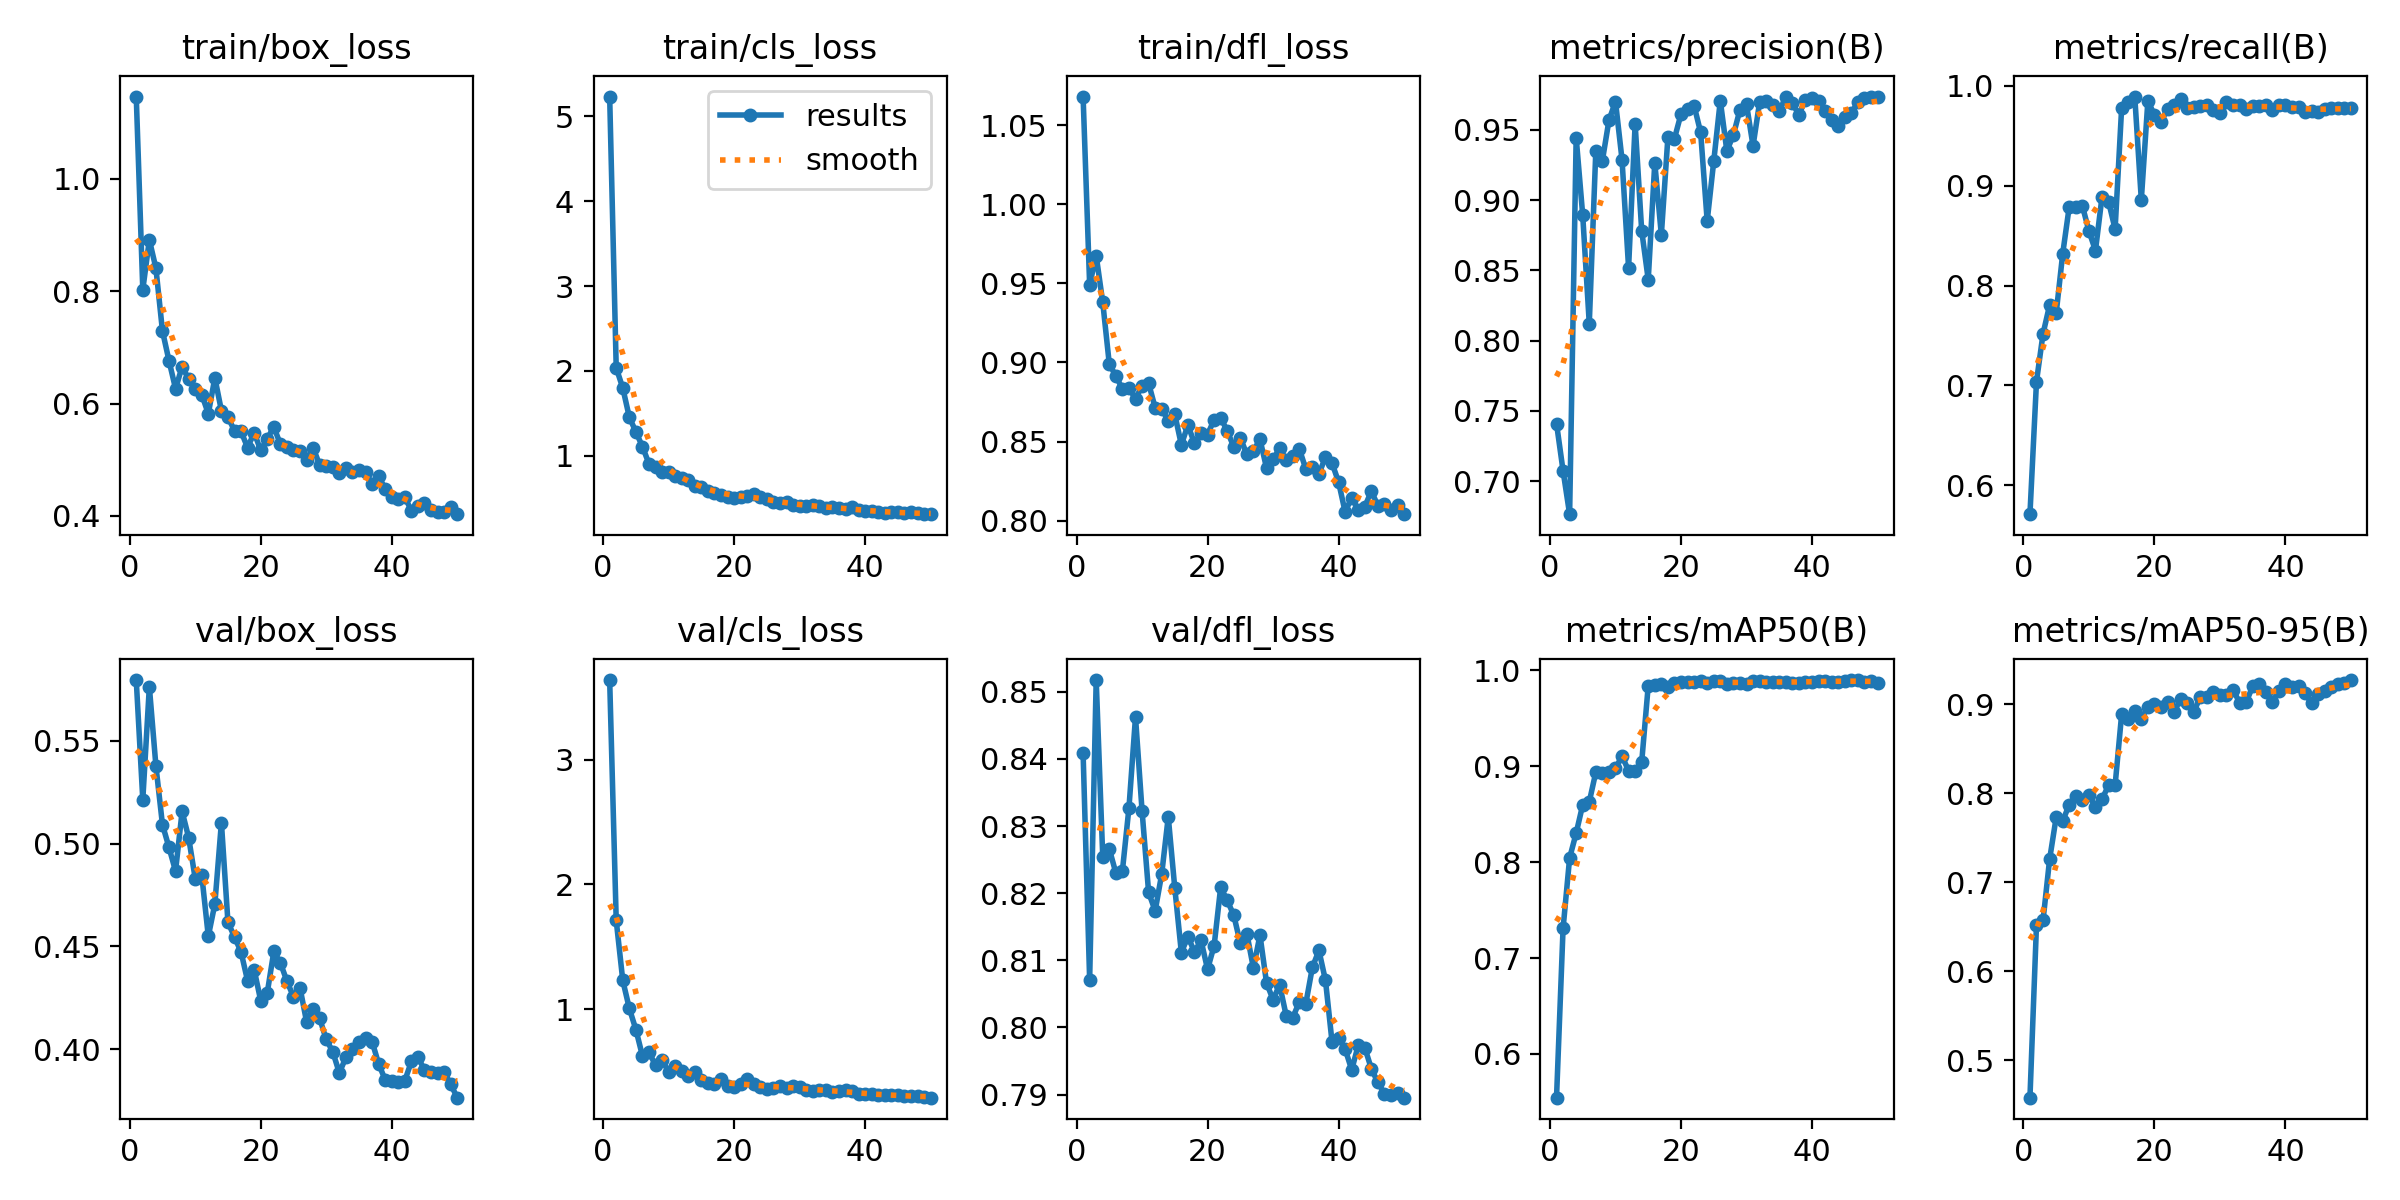

In [10]:
from IPython.display import Image, display
%cd {HOME}
print(TRAIN_DIR)
Image(filename=f'{HOME}/{TRAIN_DIR}/results.png', width=600)

C:\Users\myuser\repos\tornado-madness-bot
runs\detect\train


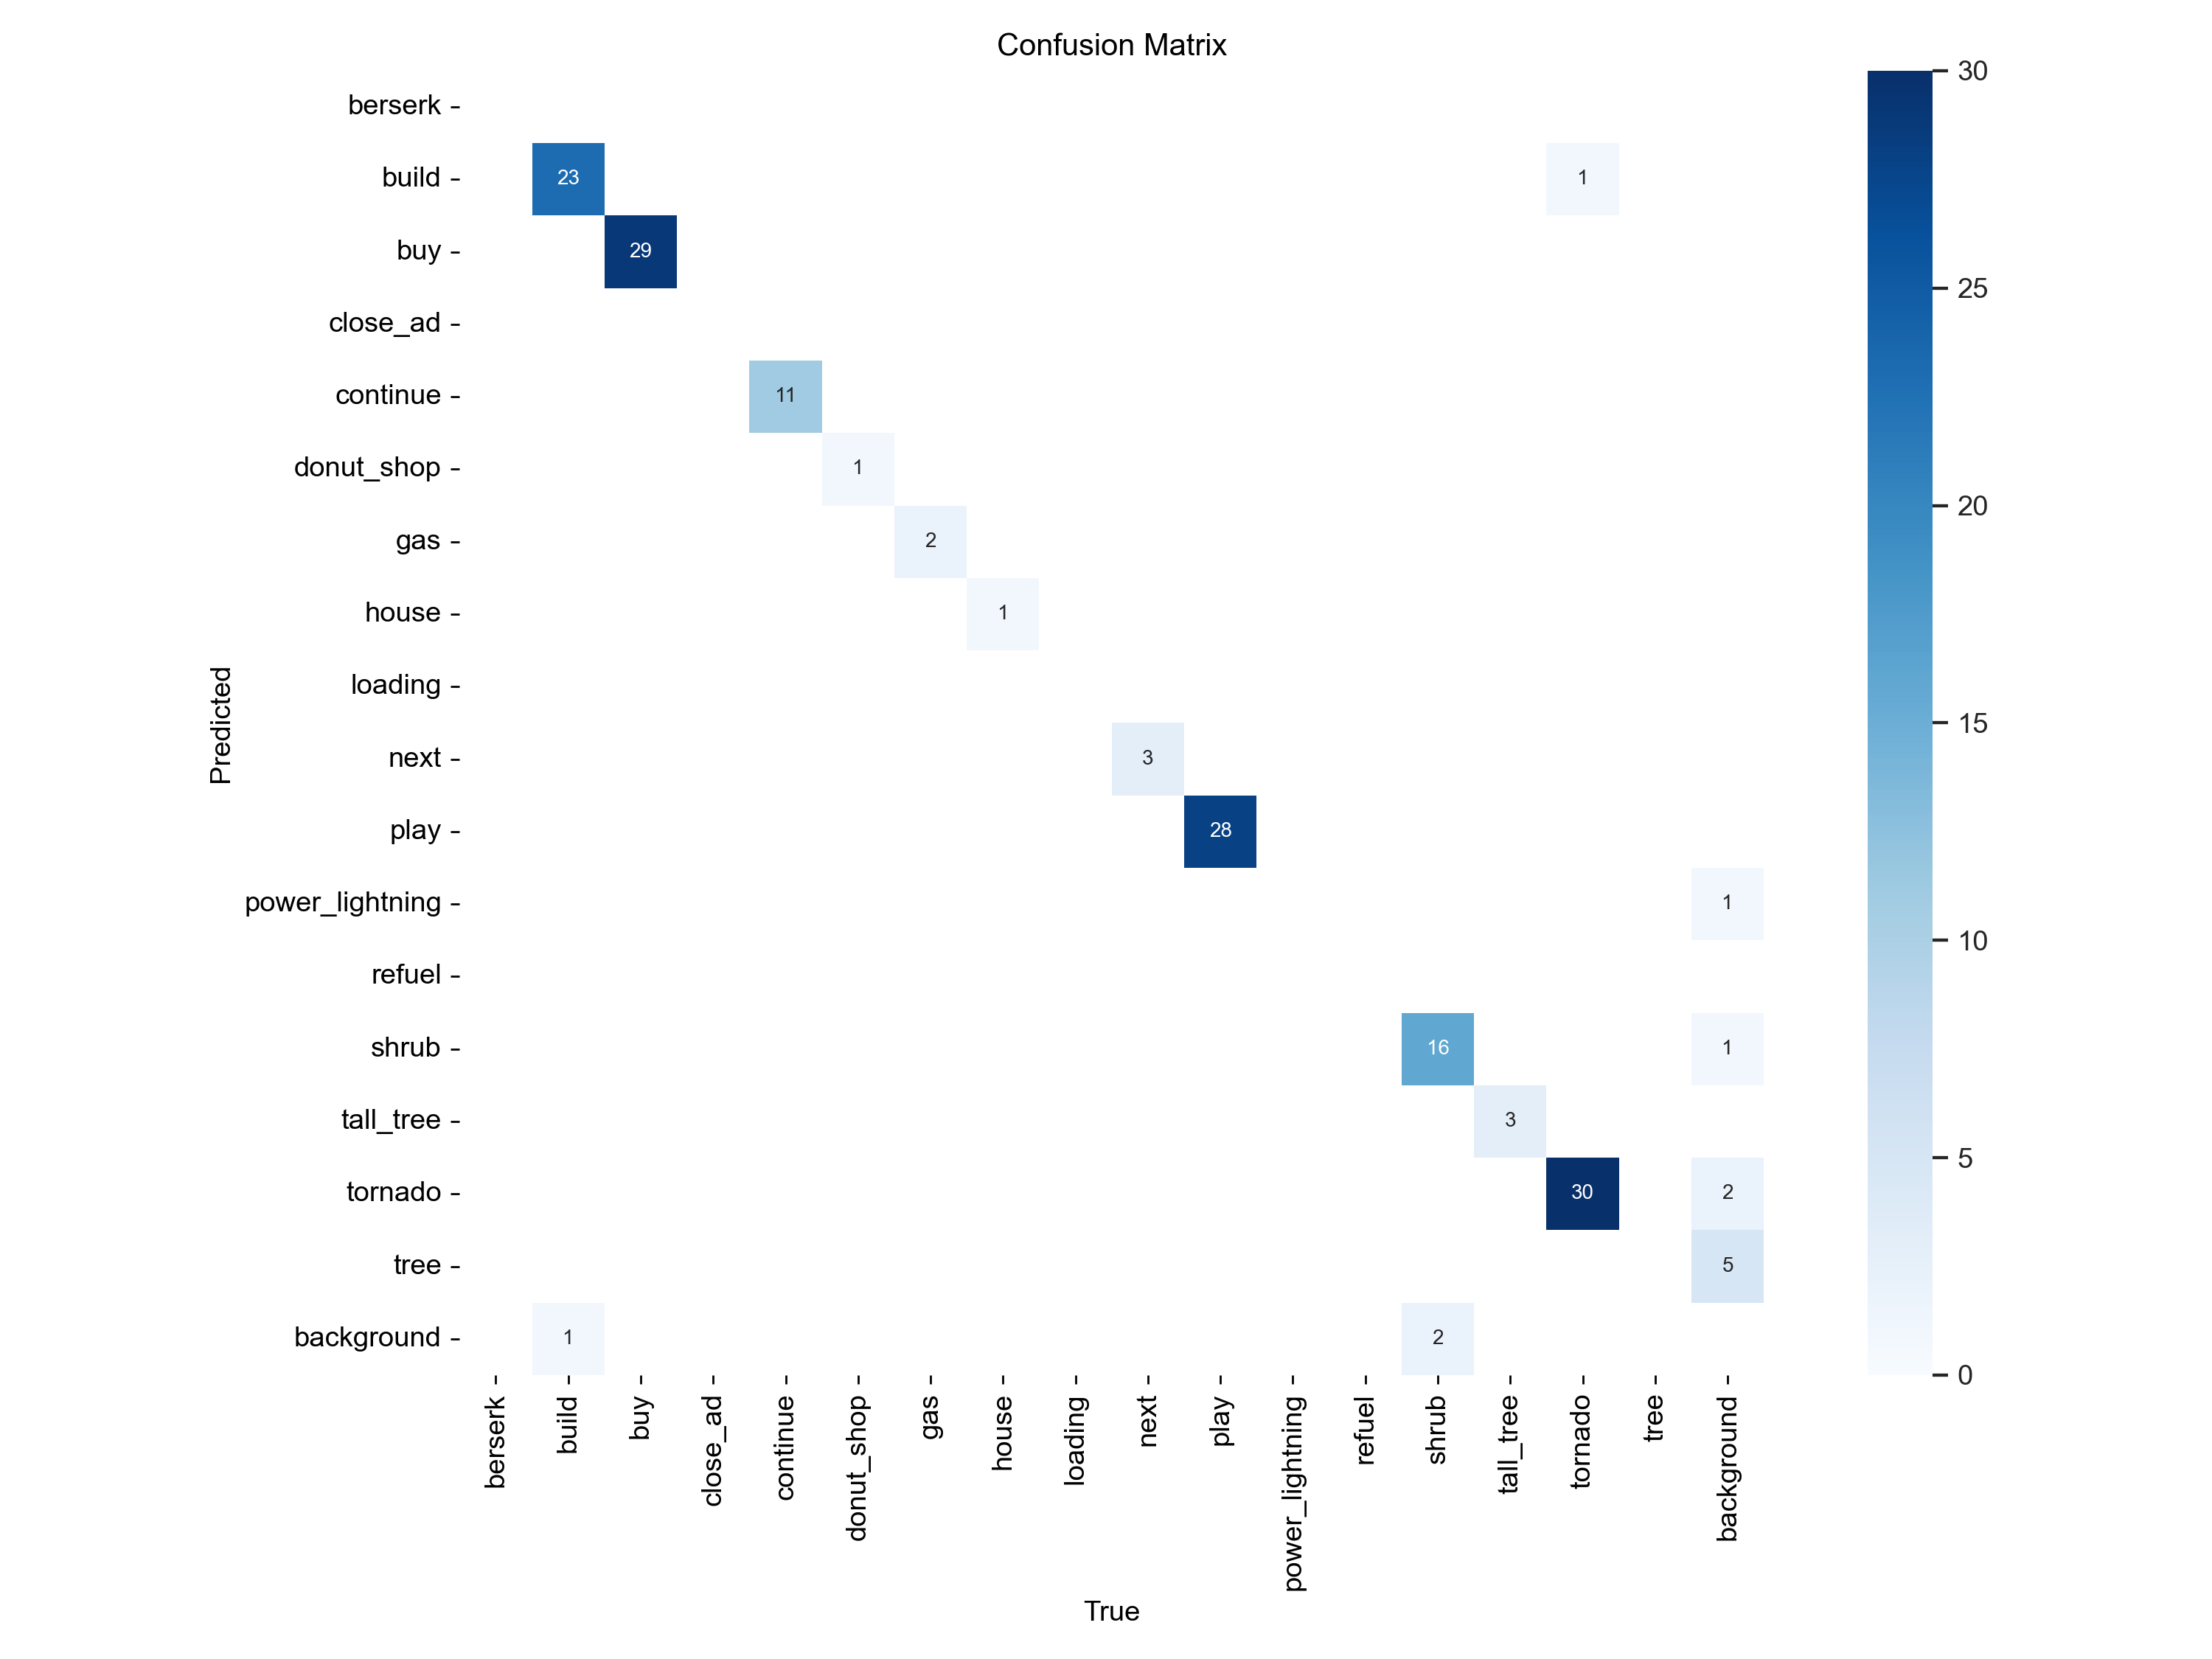

In [11]:
%cd {HOME}
print(TRAIN_DIR)
Image(filename=f'{HOME}/{TRAIN_DIR}/confusion_matrix.png', width=1200)

C:\Users\myuser\repos\tornado-madness-bot
runs\detect\train


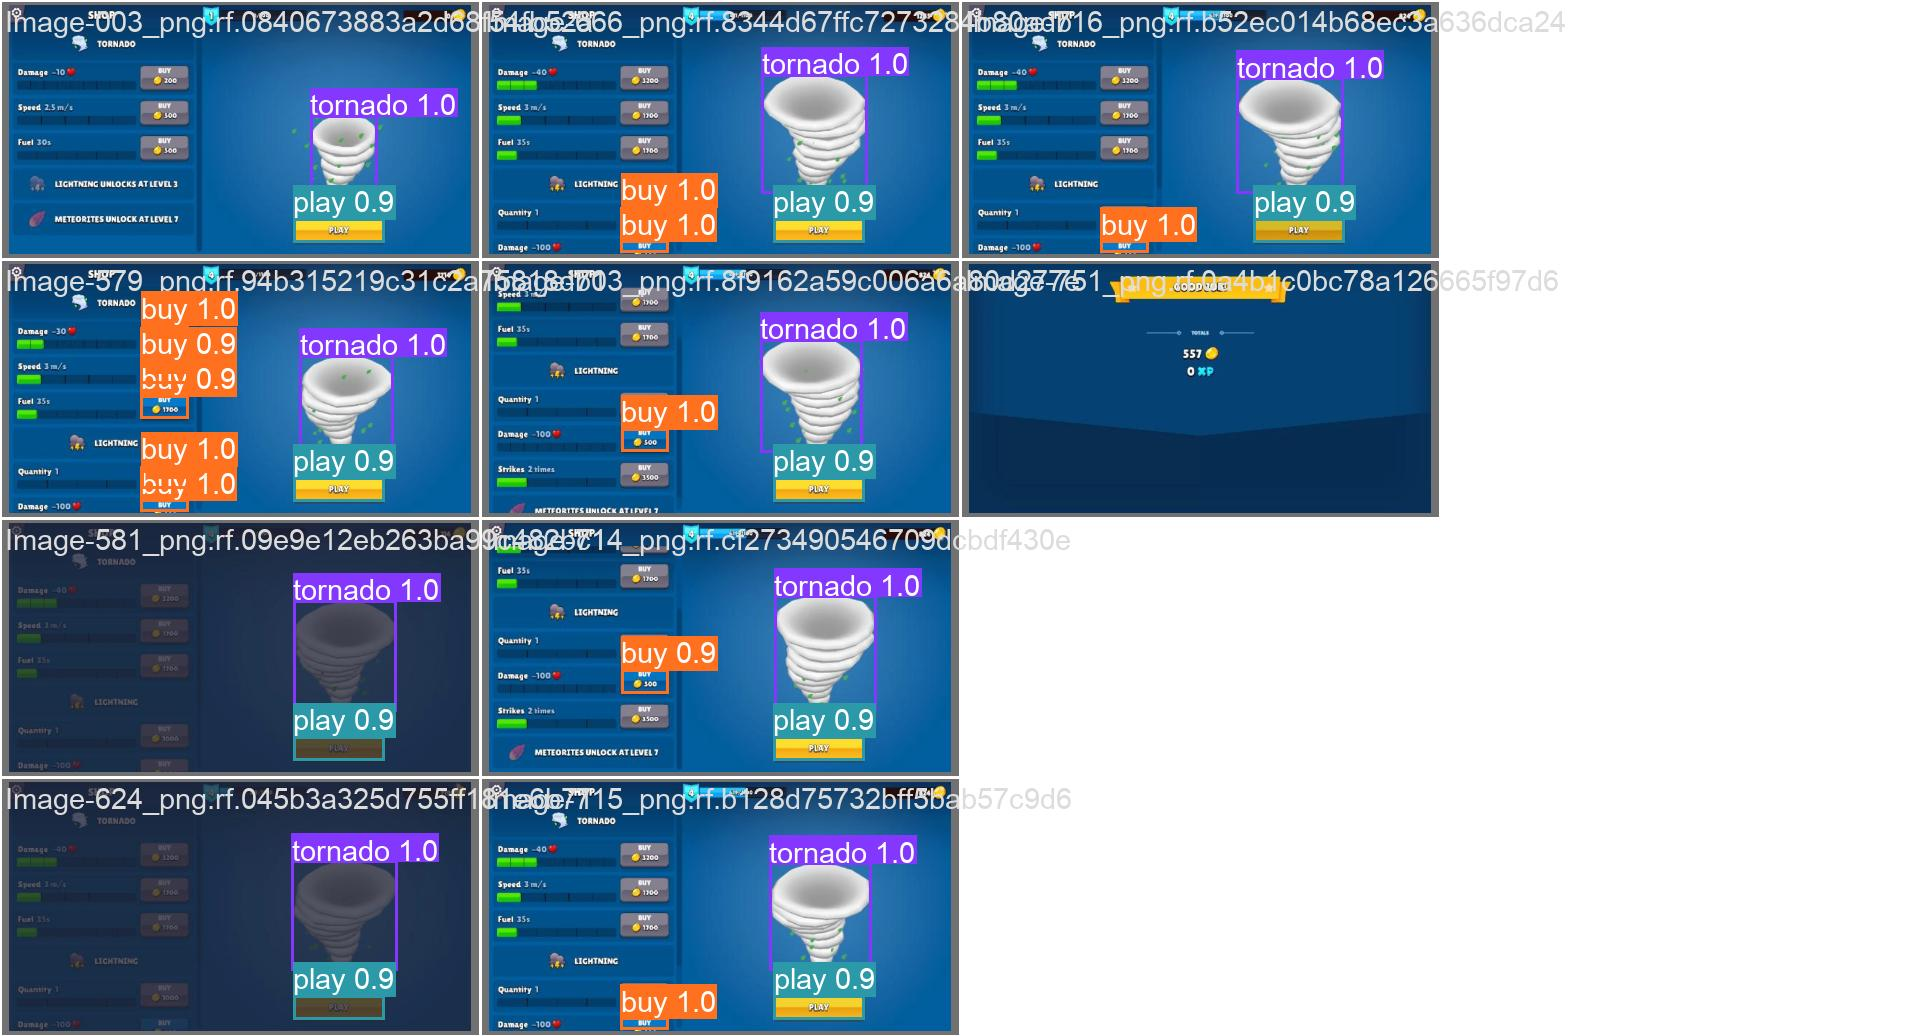

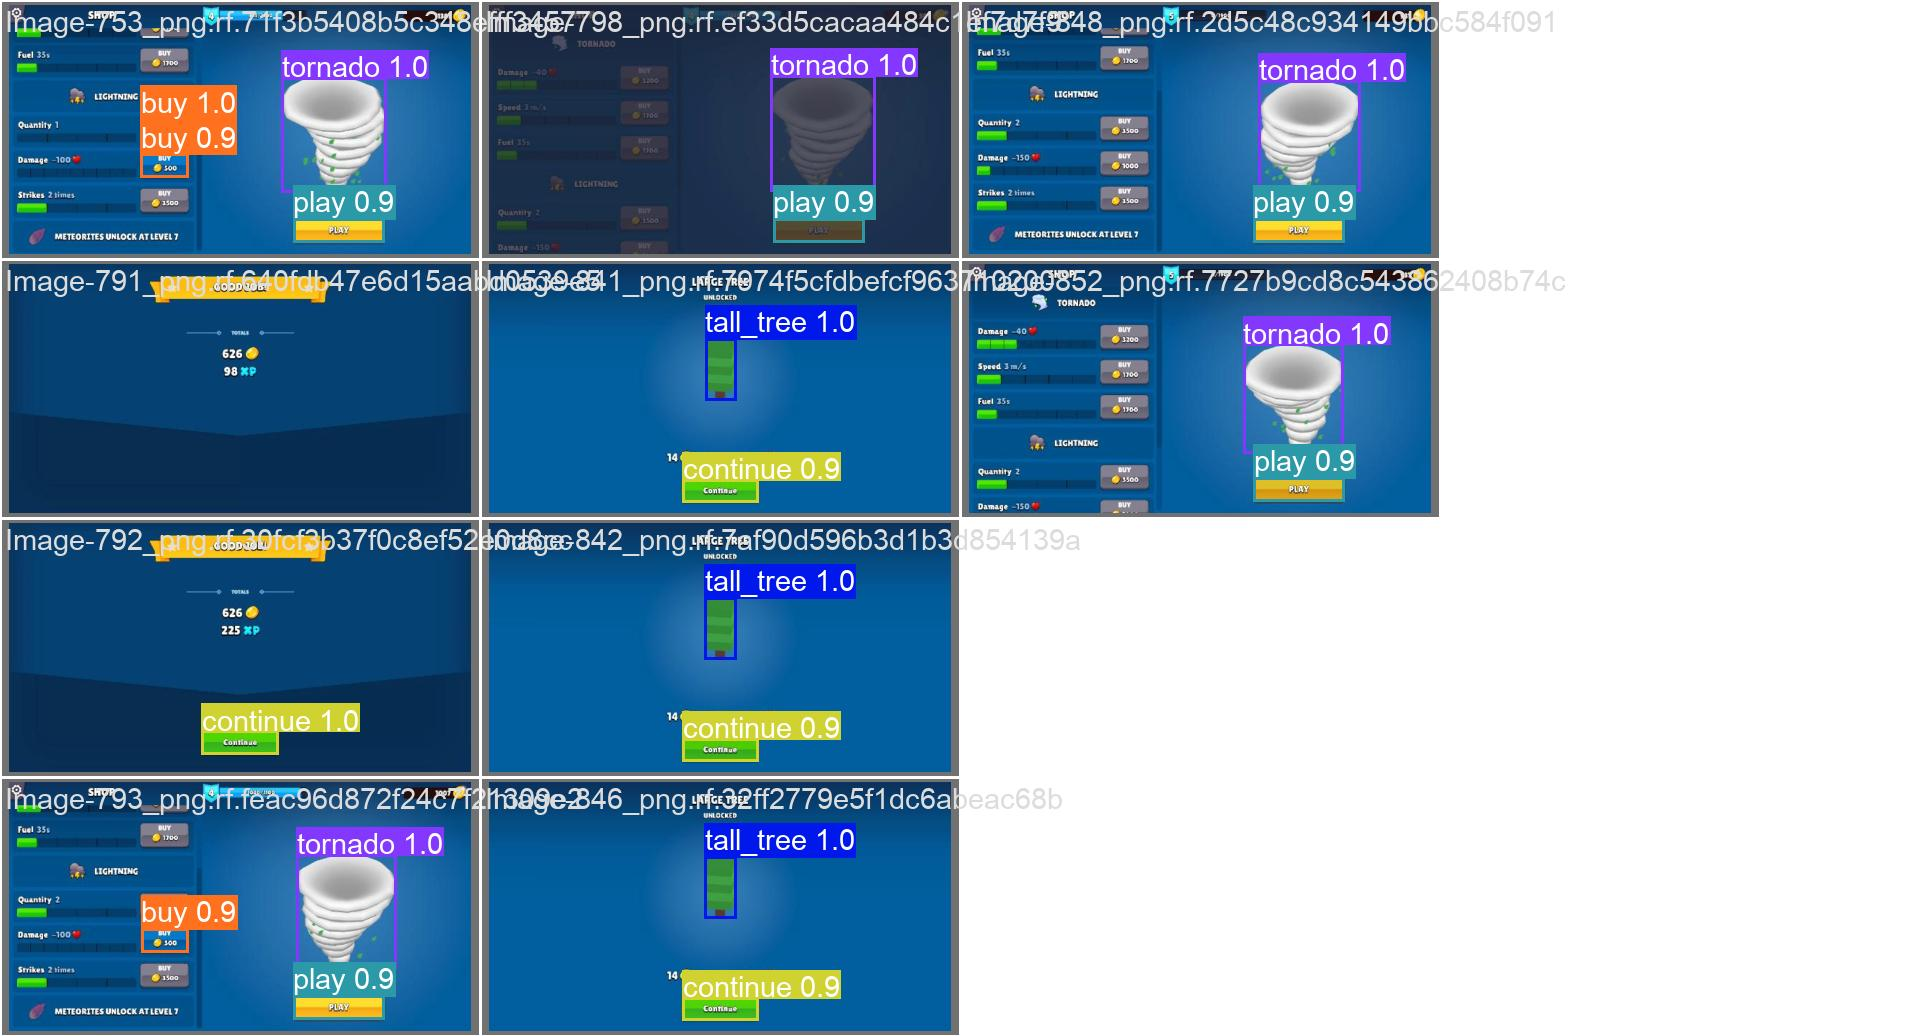

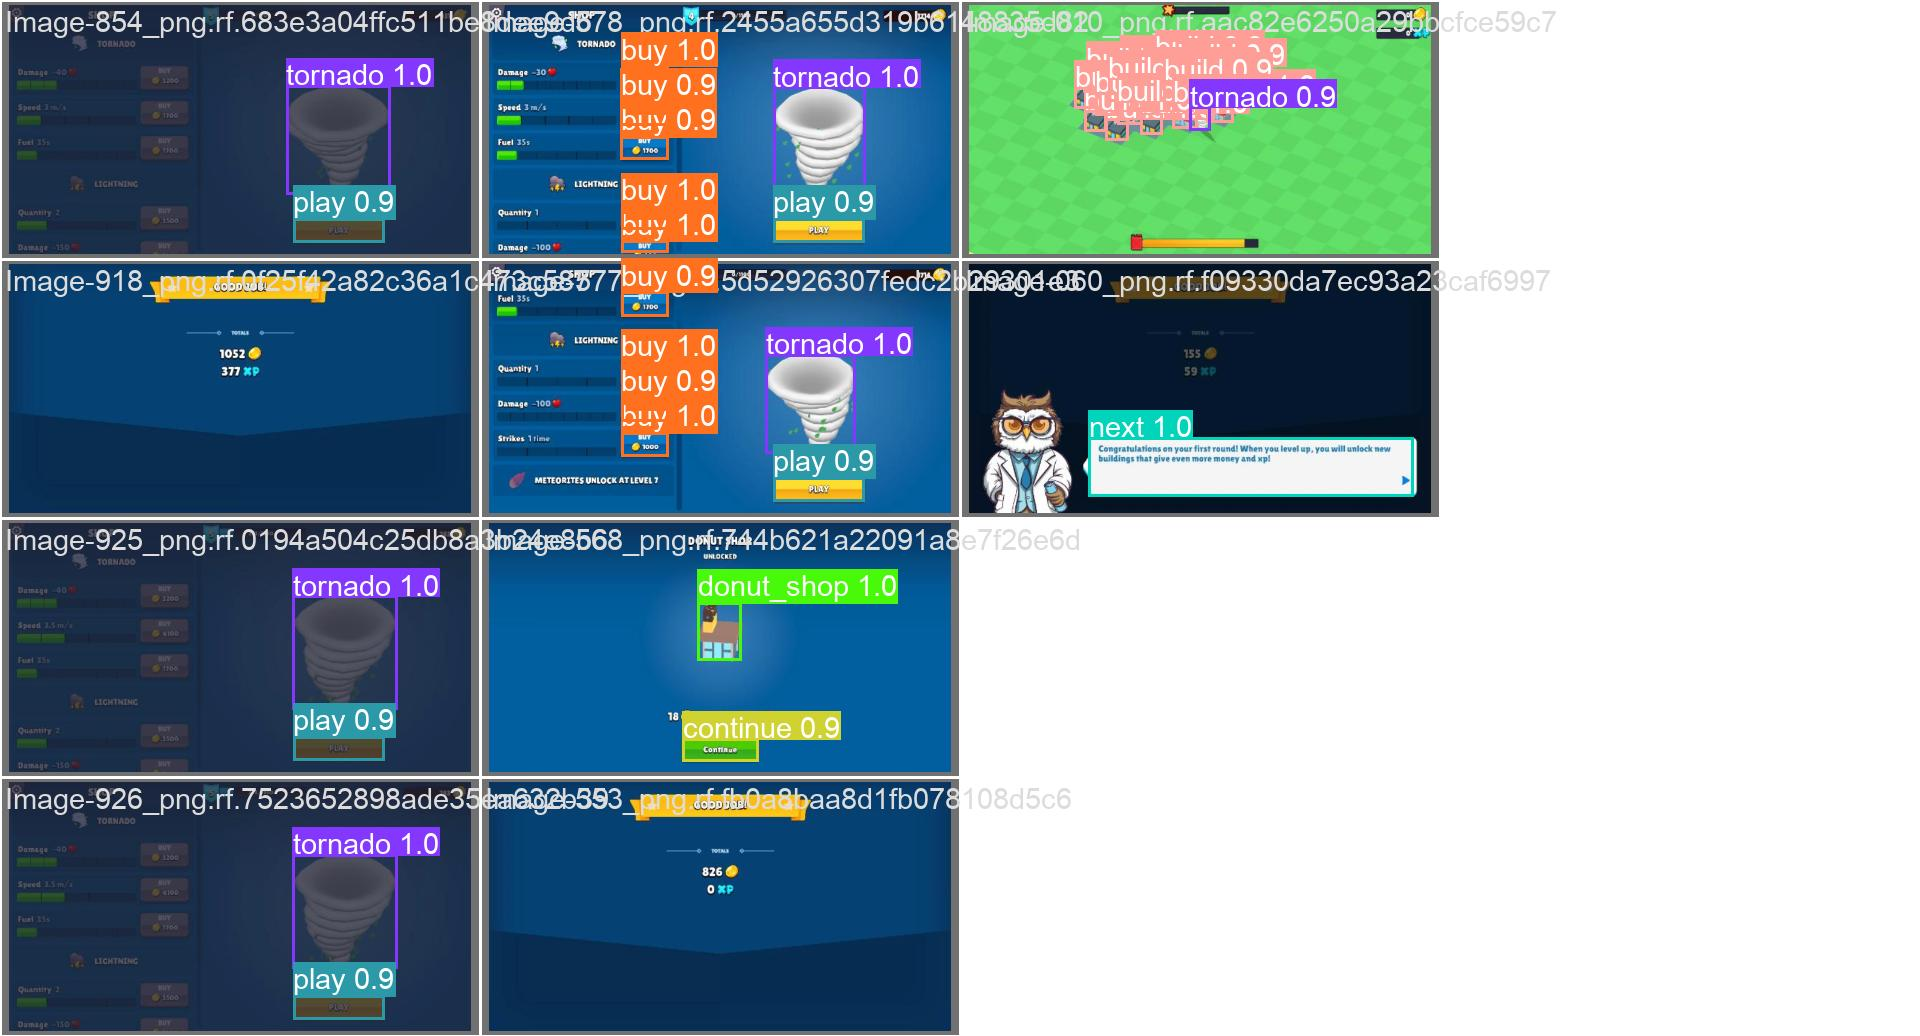

In [12]:
%cd {HOME}
print(TRAIN_DIR)
display(Image(filename=f'{HOME}/{TRAIN_DIR}/val_batch0_pred.jpg', width=1600))
print("\n")
display(Image(filename=f'{HOME}/{TRAIN_DIR}/val_batch1_pred.jpg', width=1600))
print("\n")
display(Image(filename=f'{HOME}/{TRAIN_DIR}/val_batch2_pred.jpg', width=1600))
print("\n")

In [15]:
%cd {HOME}
from ultralytics import YOLO
from ultralytics.utils.files import increment_path
vals_dir = 'runs/detect/val'
VAL_DIR = increment_path(vals_dir, exist_ok=False)

model = YOLO(f'{HOME}\\{TRAIN_DIR}\\weights\\best.pt')
results = model.val(
    data=f'{dataset.location}\data.yaml',
    plots=True,
    save=True,
    save_dir=VAL_DIR,
)
#!yolo task=detect mode=val model={HOME}/{TRAIN_DIR}/weights/best.pt data={dataset.location}/data.yaml save_dir="{VAL_DIR}"

Ultralytics YOLOv8.0.196  Python-3.9.13 torch-1.10.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)


C:\Users\myuser\repos\tornado-madness-bot


Model summary (fused): 168 layers, 11132163 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\valid\labels.cache... 54 images, 7 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]
                   all         54        151      0.974      0.978      0.987      0.923
                 build         54         24          1       0.93      0.973      0.814
                   buy         54         29      0.996          1      0.995      0.942
              continue         54         11      0.993          1      0.995      0.962
            donut_shop         54          1      0.935          1      0.995      0.995
                   gas         54          2      0.982          1      0.995      0.946
                 house         54          1      0.945          1      0.99

In [16]:
print(VAL_DIR)

runs\detect\val2


In [22]:
%cd {HOME}
from ultralytics import YOLO
from ultralytics.utils.files import increment_path
predicts_dir = 'runs/detect/predict'
PREDICT_DIR = increment_path(predicts_dir, exist_ok=False)

model = YOLO(f'{HOME}\\{TRAIN_DIR}\\weights\\best.pt')
results = model.predict(
    source=f'{dataset.location}\\test\\images',
    conf=0.25,
    line_width=1,
    save=True,
    save_dir=PREDICT_DIR,
)
#!yolo task=detect mode=predict model={HOME}/{TRAIN_PATH}/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True save_dir="{PREDICT_DIR}"

C:\Users\myuser\repos\tornado-madness-bot



image 1/27 C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\test\images\Image-002_png.rf.d2141fe5e12c18934bce00e1b8cd4bb4.jpg: 448x800 1 play, 1 tornado, 25.1ms
image 2/27 C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\test\images\Image-009_png.rf.ea5bfb894b2d9f306e929ecdee2a03c8.jpg: 448x800 18 builds, 1 tornado, 25.1ms
image 3/27 C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\test\images\Image-020_png.rf.0b98f6c9ccd91ab14ae7664cd0f65d1e.jpg: 448x800 2 builds, 1 gas, 1 tornado, 19.9ms
image 4/27 C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\test\images\Image-064_png.rf.8306b2c736d15363731feaf5e53699ba.jpg: 448x800 1 play, 1 tornado, 20.0ms
image 5/27 C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\test\images\Image-109_png.rf.ae6b3873126c3b9d3c6be63b616e611e.jpg: 448x800 3 builds, 1 refuel, 19 shrubs, 23.7ms
image 6/27 C:\Users\myuser\repos\tornado-madness-bot\tornado_madness-6\test\images\Image-190_png.rf.6f222cf3ba631bf

In [23]:
print(PREDICT_DIR)

runs\detect\predict2


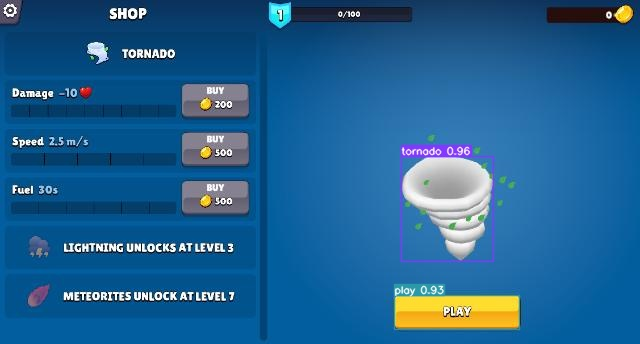

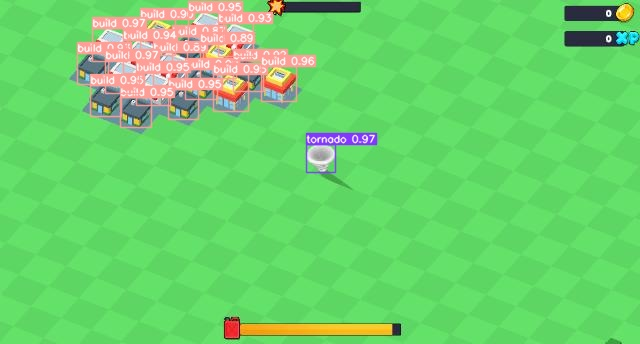

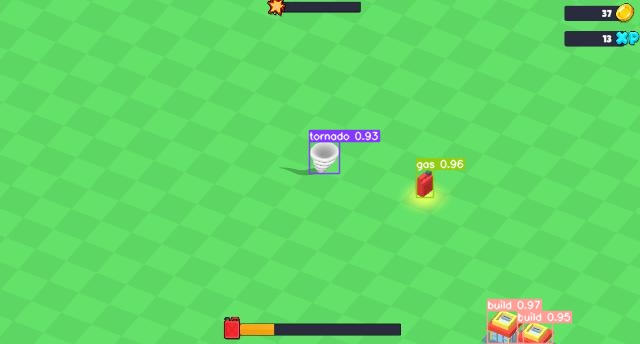

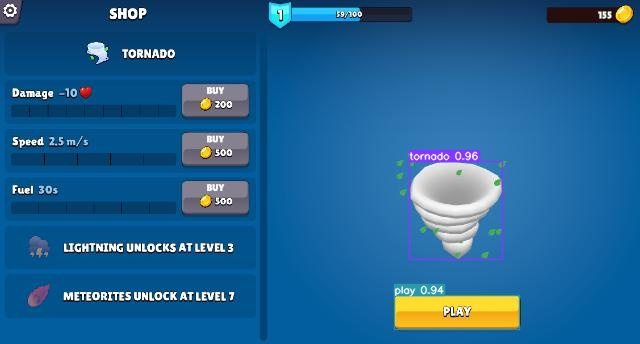

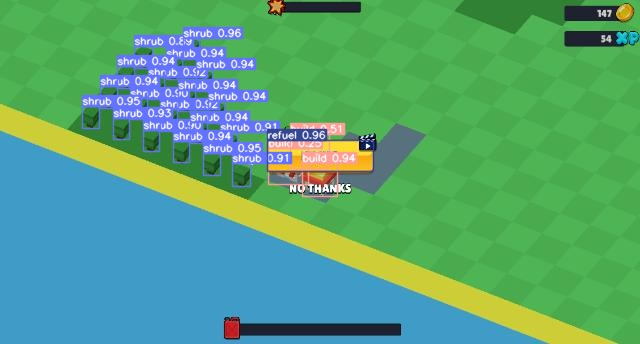

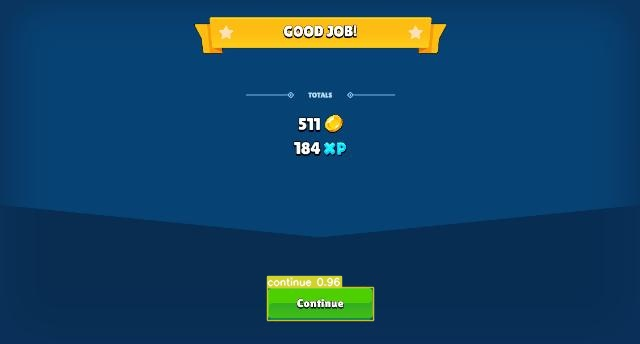

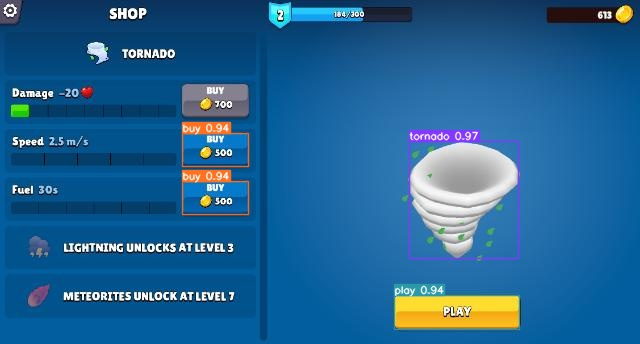

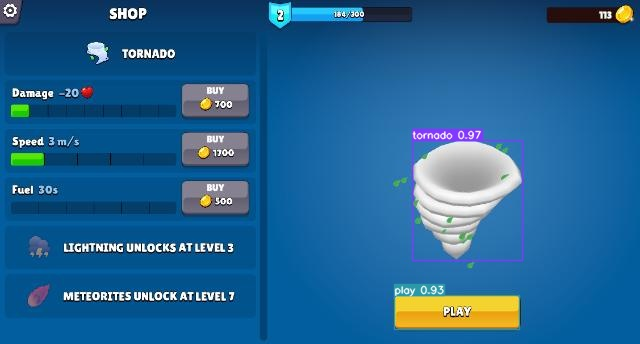

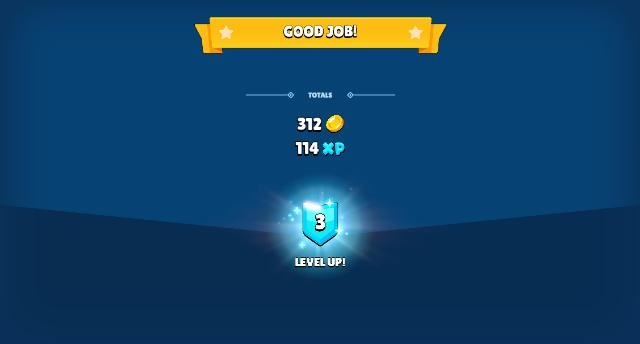

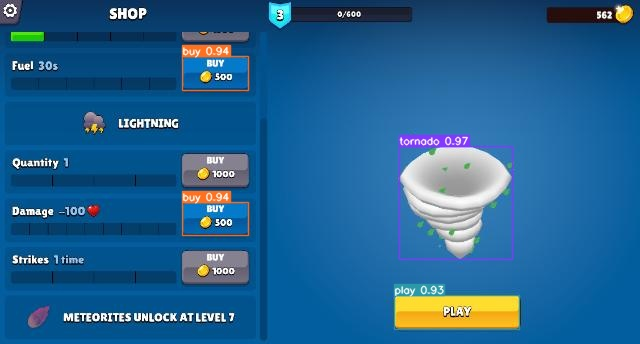

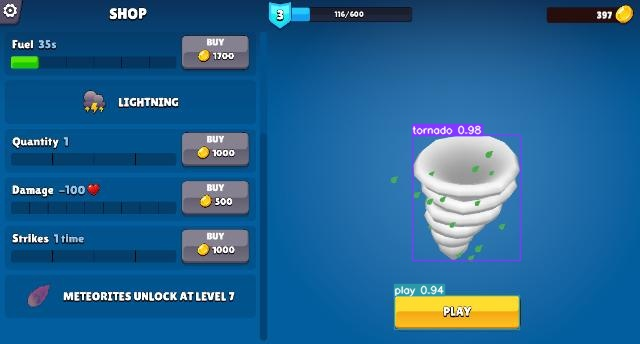

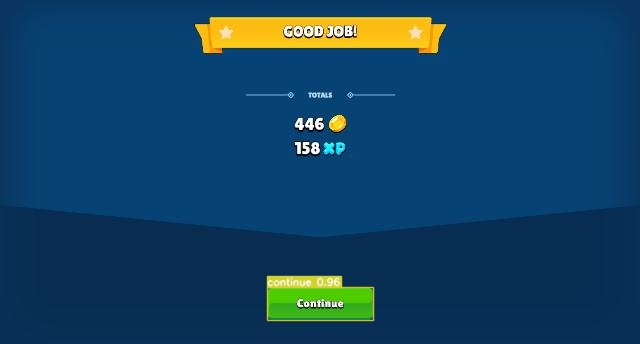

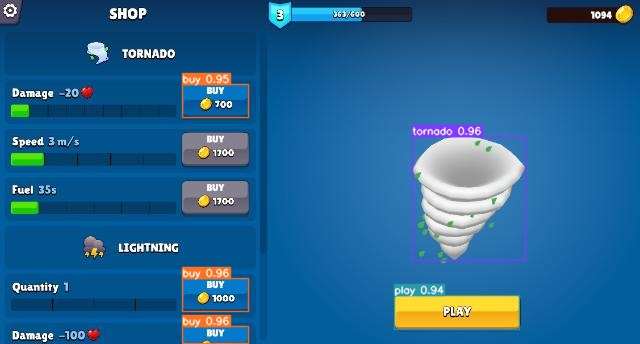

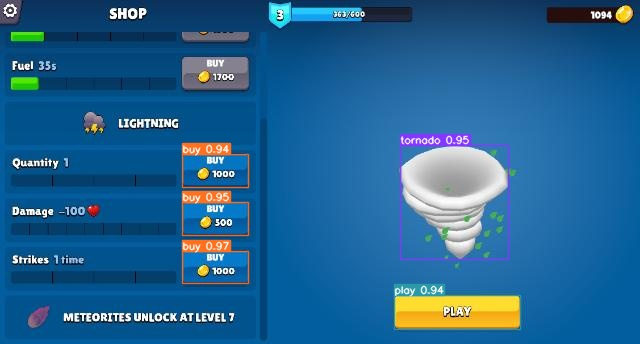

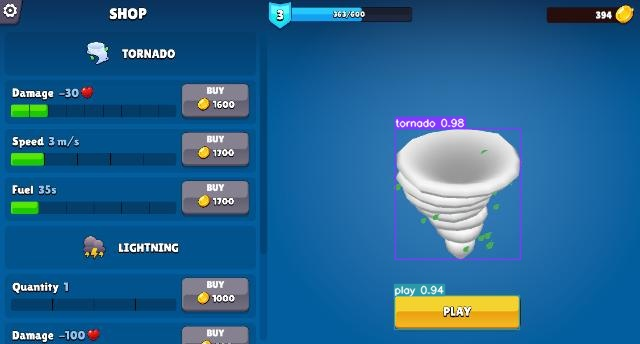

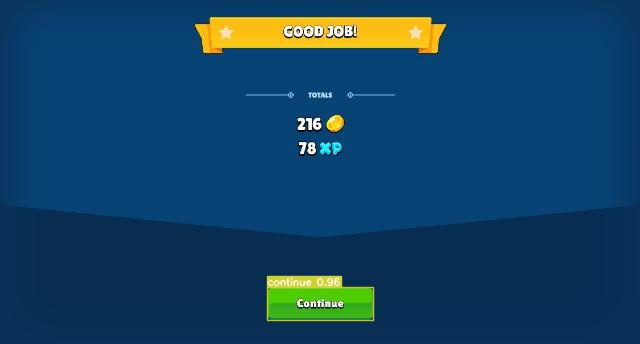

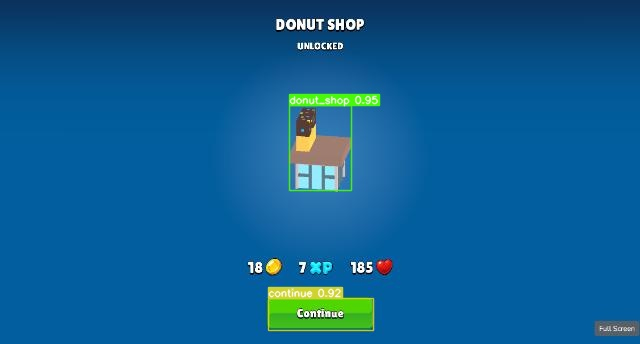

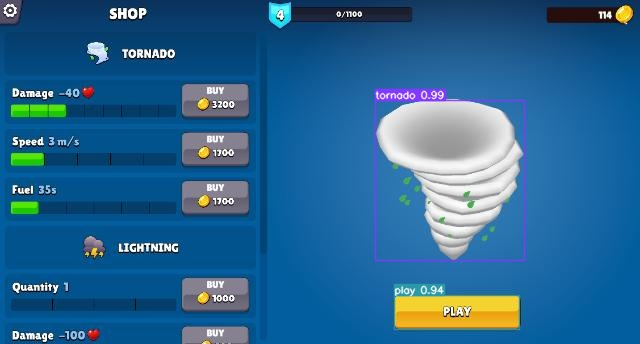

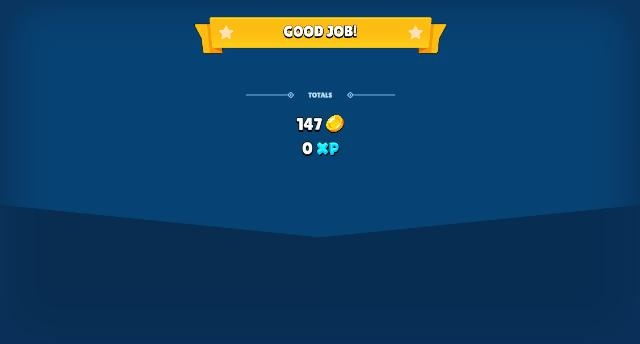

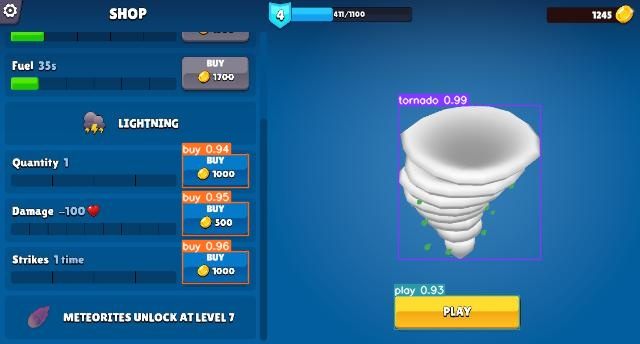

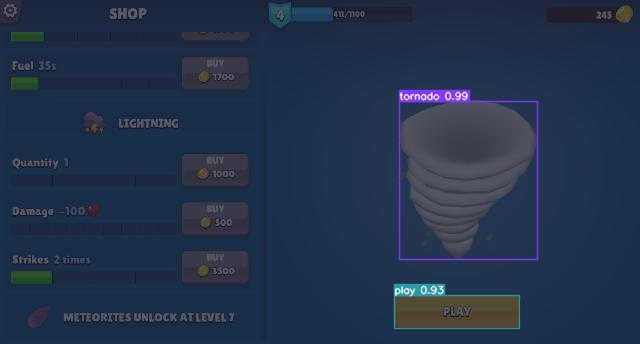

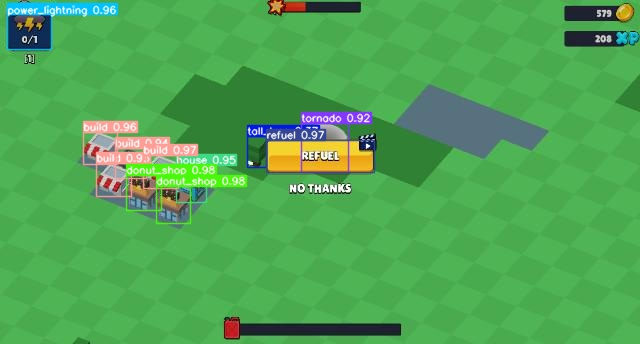

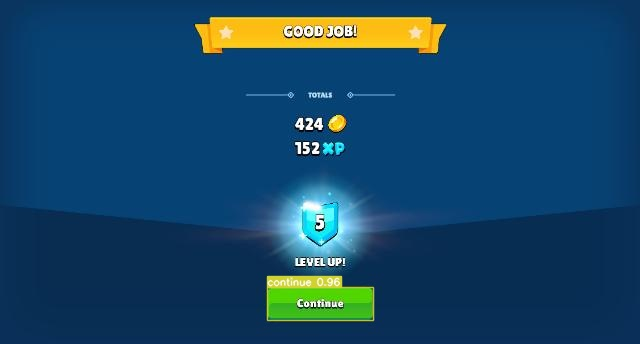

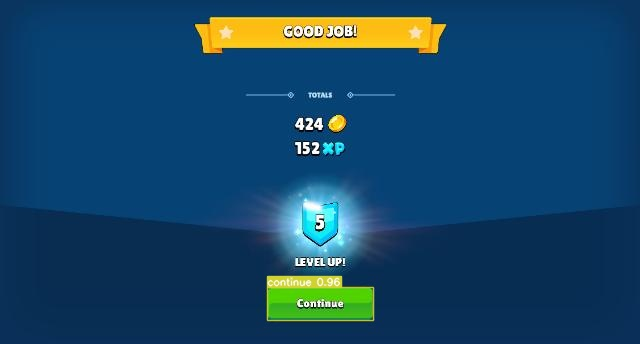

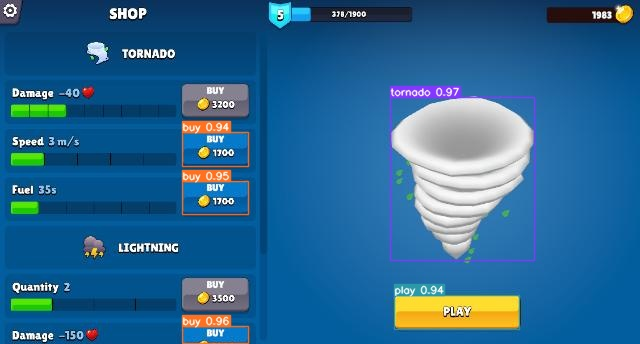

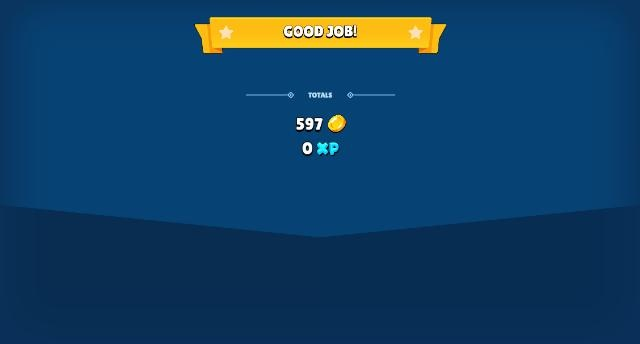

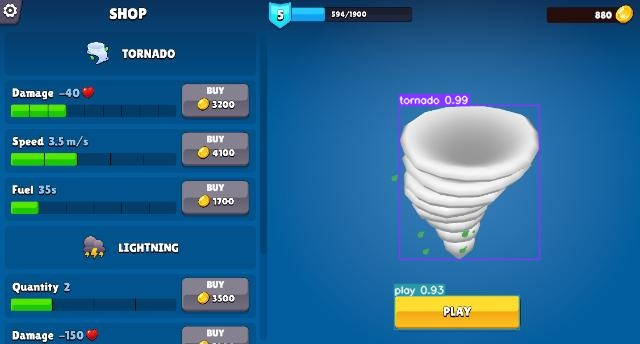

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}\\{PREDICT_DIR}\\*.jpg')[:30]:
      display(Image(filename=image_path, width=600))
      print("\n")